In [ ]:
if (None,None):
    print("None")

None


In [ ]:
import win32gui
import win32ui
from ctypes import windll
from PIL import Image

hwnd = win32gui.FindWindow(None, 'Calculator')
print(hwnd)

3474752


In [ ]:
# Gets the handle's client/private rect dimensions, window's dim relative to itself
left, top, right, bot = win32gui.GetClientRect(hwnd)
left, top, right, bot

(0, 0, 320, 532)

In [ ]:
# Gets the handles dim relative to the screen 
left, top, right, bot = win32gui.GetWindowRect(hwnd)
left, top, right, bot

(487, 146, 821, 686)

In [2]:
import win32gui
win32gui.MapWindowPoints(hwnd,None,(left, top, right, bot), 2)

AttributeError: module 'win32gui' has no attribute 'MapWindowPoints'

In [4]:
# Source - https://stackoverflow.com/a/24352388
# Posted by hazzey, modified by community. See post 'Timeline' for change history
# Retrieved 2026-02-11, License - CC BY-SA 4.0

import win32gui
import win32ui
from ctypes import windll
from PIL import Image

hwnd = win32gui.FindWindow(None, 'Calculator')

# Uncomment the following line if you use a high DPI display or >100% scaling size
windll.user32.SetProcessDPIAware()

# Change the line below depending on whether you want the whole window
# or just the client area. 
# left, top, right, bot = win32gui.GetClientRect(hwnd)
left, top, right, bot = win32gui.GetWindowRect(hwnd)
w = right - left
h = bot - top

hwndDC = win32gui.GetWindowDC(hwnd)
mfcDC  = win32ui.CreateDCFromHandle(hwndDC)
saveDC = mfcDC.CreateCompatibleDC()

saveBitMap = win32ui.CreateBitmap()
saveBitMap.CreateCompatibleBitmap(mfcDC, w, h)

saveDC.SelectObject(saveBitMap)

# Change the line below depending on whether you want the whole window
# or just the client area. 
result = windll.user32.PrintWindow(hwnd, saveDC.GetSafeHdc(), 2)
# result = windll.user32.PrintWindow(hwnd, saveDC.GetSafeHdc(), 2)
print(result)
bmpinfo = saveBitMap.GetInfo()
bmpstr = saveBitMap.GetBitmapBits(True)

im = Image.frombuffer(
    'RGB',
    (bmpinfo['bmWidth'], bmpinfo['bmHeight']),
    bmpstr, 'raw', 'BGRX', 0, 1)

win32gui.DeleteObject(saveBitMap.GetHandle())
saveDC.DeleteDC()
mfcDC.DeleteDC()
win32gui.ReleaseDC(hwnd, hwndDC)

if result == 1:
    #PrintWindow Succeeded
    im.save("test.png")


1


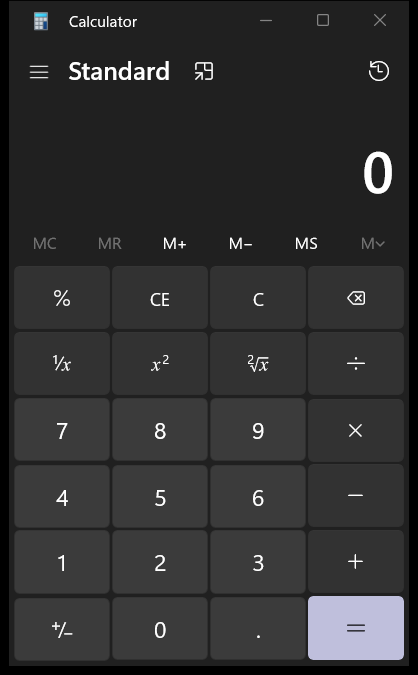

In [5]:
im